## Summarizing Data
### Introduction to Data Science
### Last Updated: November 19, 2022
---  

### PREREQUISITES
- variables
- data types
- pandas
- basic statistical quantities: counts, mean, median, standard deviation
- visualization

### SOURCES 
- [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

### OBJECTIVES
- Explain how best to summarize different types of data
- Understand what correlation represents

### CONCEPTS
- Summarizing categorical data with frequencies (counts)
- Summarizing quantitative data with mean, median, standard deviation, quantiles
- Summarizing bivariate data with correlation

---

### I. Summarizing Data

There is often too much data to easily draw conclusions.  
Visualizations can help understand data.  
Summarizing the data can also help.  

When deciding on useful summary statistics on data, it can be helpful to think about its data type.

For example, the statistics you would compute on a categorical variable would differ from a quantitative variable.

Let's import modules and look at the `Country_Happiness` dataset.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../datasets/Country_Happiness.csv')
df.head(3)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393
1,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408


### II. Categorical Data

Country has discrete levels. It doesn't make sense to directly calculate on it (e.g., mean).  
Given this information, country is a categorical variable.

For categoricals, it can be helpful to count the number of each level.

In [6]:
df.Country.value_counts()

Finland      1
Ghana        1
Nepal        1
Venezuela    1
Gabon        1
            ..
Latvia       1
Japan        1
Mauritius    1
Jamaica      1
Burundi      1
Name: Country, Length: 156, dtype: int64

It turns out each country appears once in this dataset.  
This makes sense, as each record pertains to a country. The field is a unique identifier.

## III. Quantitative Data

The remaining fields all contain floating point values.  
For this data type, it can be helpful to compute numerical summaries.

Watch what happens when we call `describe()` on the data.  
It computes summary statistics on all of the quantitative fields, ignoring the categorical variable: Country.

In [9]:
df.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.375878,5.478654,5.273090,1.922891,0.887417,1.216571,0.598026,0.456981,0.181571,0.112474
std,1.119507,1.107522,1.132544,0.513760,0.382573,0.300380,0.247925,0.162750,0.098805,0.096362
min,2.905000,3.074000,2.735000,0.292000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.453750,4.589750,4.344750,1.654250,0.616250,1.076750,0.422250,0.358250,0.109500,0.051000
50%,5.378000,5.477500,5.284500,1.908500,0.949500,1.261500,0.644000,0.494000,0.174000,0.082000
75%,6.168500,6.260000,6.051250,2.270250,1.197750,1.463000,0.777250,0.580000,0.242250,0.139000
max,7.632000,7.695000,7.569000,2.961000,1.649000,1.644000,1.030000,0.724000,0.598000,0.457000


You can summarize specific columns by placing them in a list and subsetting like this:

In [12]:
df[['Happiness score','Whisker-low']].describe()

,Happiness score,Whisker-low
count,156.000000,156.000000
mean,5.375878,5.273090
std,1.119507,1.132544
min,2.905000,2.735000
25%,4.453750,4.344750
50%,5.378000,5.284500
75%,6.168500,6.051250
max,7.632000,7.569000


**Central Tendency**  
You might recall that the mean is sensitive to outliers, while the median is not.  
For data with outliers, the median is preferable for measuring central tendency.

The mean and median (denoted 50%) of the Happiness score are similar, which indicates the data is not being skewed by outliers.  
Let's look at the histogram of Happiness score to better understand the distribution:

<AxesSubplot:xlabel='Happiness score', ylabel='Count'>

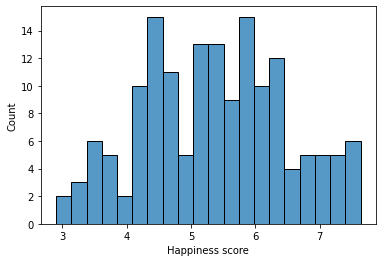

In [10]:
sns.histplot(df['Happiness score'], bins=20)

The distribution is fairly symmetric, without outliers, and ranging from approximately 3 to 8. 

**Spread**  
The standard deviation of the Happiness score is 1.12  
To understand this in relative terms, sometimes the ratio of the standard deviation to the mean is computed.  
This is called the *coefficient of variation (c.v.)*.

In [14]:
cv = df['Happiness score'].std() / df['Happiness score'].mean()
print('cv:', cv)

cv: 0.20824626834815463


**Quantiles**  
Calling `describe()` on the dataframe shows many quantile points. For example:   
The `50%` row denotes the median. Half of the Happiness scores fall below 5.378000.  
The `75%` row denotes the 75th percentile. 75% of the Happiness scores fall below 6.168500.

---

#### TRY FOR YOURSELF
1) For the `GDP` variable, calculate the 99.5 percentile

---

### IV. Bivariate Relationships in Quantitative Data

Studying bivariate relationships in quantitative data can be both interesting and useful in modeling.  
As we saw earlier, scatterplots can show the association between two variables.

Let's look at the relationship between Freedom and Happiness score:

<AxesSubplot:xlabel='Explained by: Freedom to make life choices', ylabel='Happiness score'>

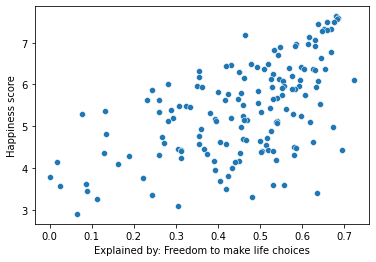

In [24]:
sns.scatterplot(x='Explained by: Freedom to make life choices', y='Happiness score', data=df)

**What is the relationship between these variables?**  

Answer: Roughly, there is a positive association.

**Correlation**  
It can be helpful to quantify the association between two quantitative variables and express the value in a defined range.  
The *Pearson correlation coefficient*, sometimes simply called *correlation*, is a measure that does this, and it takes a value in $[-1, 1]$.

Formally, correlation is the ratio between the covariance of two variables and the product of their standard deviations:

$\rho_{XY} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$

Correlation = 1 => strong positive (linear) association. X and Y increase together.  
Correlation = 0 => no association  
Correlation = -1 => strong negative association. X and Y move in opposite directions.

Next, let's compute the correlation between Happiness and Freedom:

In [22]:
df[['Explained by: Freedom to make life choices','Happiness score']].corr()

,Explained by: Freedom to make life choices,Happiness score
Explained by: Freedom to make life choices,1.00000,0.56229
Happiness score,0.56229,1.00000


We see that the correlation is 0.56, which indicates a positive association.  This agrees with the scatterplot.

### V. Summary



In this notebook, you learned:

- methods for summarizing categorical and quantitative data
- methods for studying the relationship in bivariate data

These techniques will be crucial as you make sense of data.

---